# **Regularisation in PyTorch - Part 1**
### **First we train a CNN on the Fashion-MNIST Dataset usng NO Regularisation Methods**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-12-02%20at%204.01.54%402x.png)
---



---


In this lesson, we first learn to create a **simple Convolutional Neural Network model** in PyTorch and train it to **classify images in the Fashion-MNIST Dataset**, without the use of any regularisation methods.
1. Import PyTorch libraries, define our Transformers, Load our dataset and Visualize our images.
2. Build a Simple CNN without Regularisation
3. Train Our CNN
3. Take a look at Data Augmentation



# **Import PyTorch libraries, Define Transfomers and Load & Visualise Dataset**

In [1]:
# Import PyTorch
import torch
import PIL

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))
device = 'cuda' #'cpu' if no GPU available

GPU available: True


### **Our Data Transform**

In [2]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

In [3]:
# Load our Training Data and specify what transform to use when loading
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:03<00:00, 8307931.84it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 112723.93it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 517543.53it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5969664.64it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [4]:
# Prepare train and test loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

# Create a list with our class names
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [5]:
# We have 60,000 Image samples for our training data & 10,000 for our test data
# each 28 x 28 pixels, as they are grayscale, there is no 3rd dimension to our image
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### **Visualising Our Data**

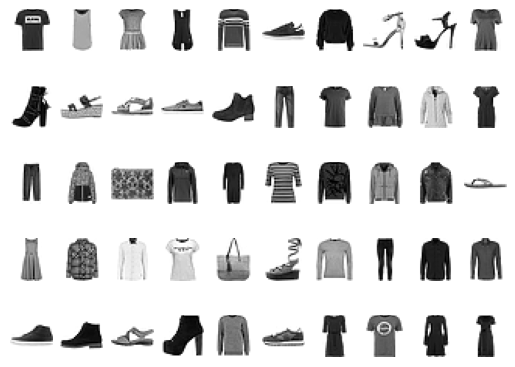

In [6]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')


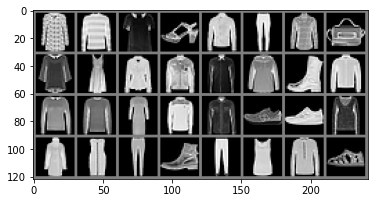

 Coat Pullover Shirt Sandal  Coat Trouser Shirt   Bag


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 표시하는 함수
def imshow(img):
    img = img / 2 + 0.5     # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # 이미지 배열의 축을 변환하여 표시
    plt.show()

# 일부 랜덤 훈련 이미지 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 표시
imshow(torchvision.utils.make_grid(images))

# 레이블 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


# **2. Building and Training Our Simple CNN with No Regularisation**

#### **Defining Our Model**

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

#### **Defining our Loss and Optimisation Functions**

In [8]:
# 옵티마이저 함수 불러오기
import torch.optim as optim

# 교차 엔트로피 손실 함수를 손실 함수로 사용
criterion = nn.CrossEntropyLoss()

# 경사 하강법 알고리즘 또는 옵티마이저 설정
# 학습률 0.001로 설정된 확률적 경사 하강법(SGD)을 사용
# 모멘텀(momentum)을 0.9로 설정
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# **3. Training Our Model**

In [ ]:
# 훈련 데이터셋을 여러 번 반복 (각 반복은 에폭(epoch)이라고 함)
epochs = 15

# 로그를 저장할 빈 배열 생성
epoch_log = []
loss_log = []
accuracy_log = []

# 지정된 에폭 수 만큼 반복
for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    # 각 미니 배치 후 손실을 누적하여 저장
    running_loss = 0.0

    # trainloader 이터레이터를 통해 반복
    # 각 사이클은 미니 배치
    for i, data in enumerate(trainloader, 0):
        # 입력과 레이블 가져오기; data는 [inputs, labels] 리스트
        inputs, labels = data

        # 데이터를 GPU로 이동
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 학습 전 기울기 초기화 (0으로 설정)
        optimizer.zero_grad()

        # 순전파 -> 역전파 + 최적화
        outputs = net(inputs) # 순전파
        loss = criterion(outputs, labels) # 손실 계산 (예측 결과와 실제 값의 차이)
        loss.backward() # 역전파를 통해 모든 노드의 새로운 기울기 계산
        optimizer.step() # 기울기/가중치 업데이트

        # 학습 통계 출력 - 에폭/반복/손실/정확도
        running_loss += loss.item()
        if i % 100 == 99:    # 100 미니 배치마다 손실 출력
            correct = 0 # 올바른 예측 개수를 저장할 변수 초기화
            total = 0 # 반복된 레이블의 총 개수를 저장할 변수 초기화

            # 검증 과정에서는 기울기가 필요 없으므로
            # no_grad로 감싸서 메모리 절약
            with torch.no_grad():
                # testloader 이터레이터를 통해 반복
                for data in testloader:
                    images, labels = data
                    # 데이터를 GPU로 이동
                    images = images.to(device)
                    labels = labels.to(device)

                    # 테스트 데이터 배치를 모델에 통과시키기 (순전파)
                    outputs = net(images)

                     # 최대값에서 예측값 가져오기
                    _, predicted = torch.max(outputs.data, 1)
                    # 총 레이블 개수를 total 변수에 계속 추가
                    total += labels.size(0)
                    # 올바르게 예측된 개수를 correct 변수에 계속 추가
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 100
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    # 각 에폭 후 학습 통계 저장
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')


Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.037, Test Accuracy = 59.470%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.979, Test Accuracy = 71.360%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.743, Test Accuracy = 73.110%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.684, Test Accuracy = 73.080%
Epoch: 1, Mini-Batches Completed: 500, Loss: 0.633, Test Accuracy = 75.600%
Epoch: 1, Mini-Batches Completed: 600, Loss: 0.605, Test Accuracy = 76.870%
Epoch: 1, Mini-Batches Completed: 700, Loss: 0.575, Test Accuracy = 78.810%
Epoch: 1, Mini-Batches Completed: 800, Loss: 0.547, Test Accuracy = 78.810%
Epoch: 1, Mini-Batches Completed: 900, Loss: 0.578, Test Accuracy = 79.330%
Epoch: 1, Mini-Batches Completed: 1000, Loss: 0.573, Test Accuracy = 77.670%
Epoch: 1, Mini-Batches Completed: 1100, Loss: 0.538, Test Accuracy = 78.740%
Epoch: 1, Mini-Batches Completed: 1200, Loss: 0.559, Test Accuracy = 78.190%
Epoch: 1, Mini-Batches Completed: 1300, Loss: 0.536, Test Accura

#### **Our Model's Accuracy**

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.4}%')

Accuracy of the network on the 10000 test images: 91.14%


#### **Our Training Plots**

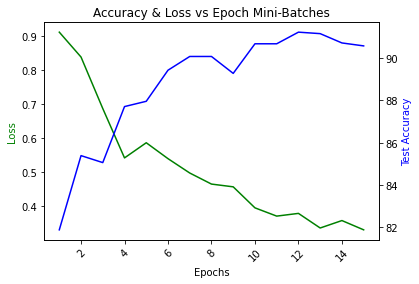

In [ ]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch Mini-Batches")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

#### **Saving Our Model's Weights**

In [ ]:
PATH = './fashion_mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

# **4. 데이터 증강**

교육 데이터에 데이터 증강을 도입하기 위해 단순히 새로운 변환 기능을 만듭니다.

**이전 변환 기능 기억**

'''transform =변신.구성([변신.ToTensor()],
transforms.Normalize((0.5,), (0.5, ) ]```

### **우리는 먼저 데이터 증강이 우리의 이미지에 어떤 영향을 미치는지 보여줄 것입니다**

In [ ]:
# We import PIL, an Image Processing library to implement random rotations
import PIL

data_aug_transform = transforms.Compose([
        transforms.RandomAffine(degrees = 10, translate = (0.05,0.05), shear = 5),
        transforms.ColorJitter(hue = .05, saturation = .05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15, resample = PIL.Image.BILINEAR),
        transforms.Grayscale(num_output_channels = 1)
])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1249: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


#### **Perform the Data Augmentatin on a Single Image using the function below to Visualize the effects**

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showAugmentations(image, augmentations = 6):
    fig = figure()
    for i in range(augmentations):
        a = fig.add_subplot(1,augmentations,i+1)
        img = data_aug_transform(image)
        imshow(img ,cmap='Greys_r')
        axis('off')

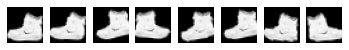

In [ ]:
# Load the first Image from our training data as a numpy array
image = trainset.data[0].numpy()

# Convert it to PIL image's format
img_pil = PIL.Image.fromarray(image)

showAugmentations(img_pil, 8)